In [3]:
import os
os.listdir("modified-dataset")


['train', 'val', 'test']

Found 2400 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.1512 - loss: 2.2590

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 43s 549ms/step - accuracy: 0.1518 - loss: 2.2580 - val_accuracy: 0.3433 - val_loss: 1.9507
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 551ms/step - accuracy: 0.3221 - loss: 1.8982 - val_accuracy: 0.4233 - val_loss: 1.6788
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 43s 571ms/step - accuracy: 0.4417 - loss: 1.6113 - val_accuracy: 0.5467 - val_loss: 1.4053
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 562ms/step - accuracy: 0.5511 - loss: 1.3135 - val_accuracy: 0.5500 - val_loss: 1.2777
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 556ms/step - accuracy: 0.6200 - loss: 1.1308 - val_accuracy: 0.6500 - val_loss: 1.1701
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 43s 574ms/step - accuracy: 0.7086 - loss: 0.8788 - val_accuracy: 0.6267 - val_loss: 1.0570
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 43s 568ms/step - accuracy: 0.7419 - loss: 0.7686 - val_accuracy: 0.6267 - val_loss: 1.0940
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 550ms/step - accuracy: 0.7574 - loss: 0.7043 - val_accuracy: 0.663

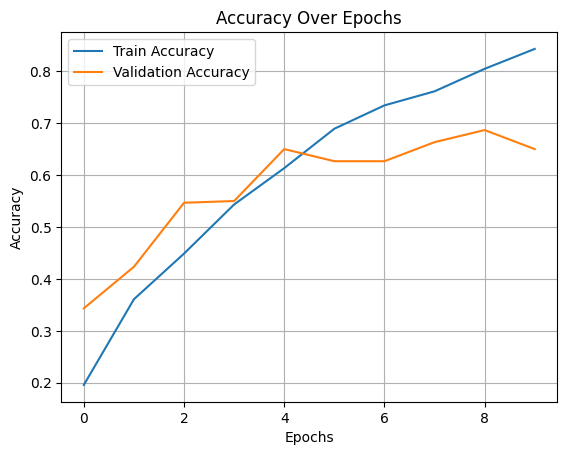

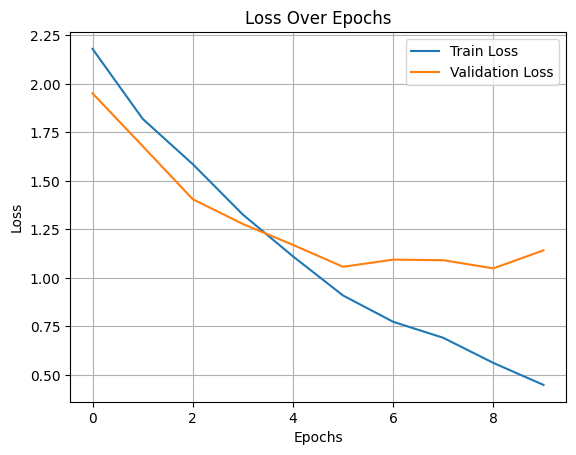

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
train_dir = 'modified-dataset/train'
test_dir = 'modified-dataset/test'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
model.save("ewaste_model.h5")

